# Electronic_sales_Data Analysis (2020 - 2024)

The dataset contains user ratings for various electronics items sold, along with the category of each item and time of sale.

## Importing libraries 

In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

## MYSQL Connection

In [30]:
mydb = mysql.connector.connect(host="localhost",user="root",password="rohan",database="ele_db") # connect the mysql Database
mycursor = mydb.cursor() # create cursor that allows to interact with the database
mycursor.execute("SELECT * FROM sales") # execute is to execute the mySQL
myresult = mycursor.fetchall()
dataset = pd.DataFrame(myresult, columns=[col[0] for col in mycursor.description])
print(dataset.head())

   item_id  user_id  rating  timestamp  gender    category    brand  year  \
0        7      131       4      36692  Female  Home Audio  Philips  2020   
1       19      231       5      36891  Female      Camera    Canon  2020   
2       14      233       5      36893  Female      Camera    Kodak  2021   
3       14      257       5      36926  Female      Camera    Kodak  2021   
4       14      269       5      36952  Female      Camera    Kodak  2021   

   month  quantity  unitprice  amount  
0      6         5       6360   31800  
1     12        10       9955   99550  
2      1         9       7639   68751  
3      2         7       5097   35679  
4      3        10       6472   64720  


## DATA CLEANING 

In [3]:
# list of last five rows
dataset.tail()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
246,262,4715,4,38640,Female,Camera,Kodak,2023,10,5,5029,25145
247,145,4759,1,38646,Female,Camera,Canon,2023,10,5,7428,37140
248,179,4778,5,38649,Female,Camera,Canon,2023,10,7,7962,55734
249,217,4787,5,38651,Female,Camera,Kodak,2023,10,10,5526,55260
250,251,4789,4,38652,Female,Camera,Kodak,2023,10,7,8057,56399


In [4]:
# shape
dataset.shape

(251, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    251 non-null    int64 
 1   user_id    251 non-null    int64 
 2   rating     251 non-null    int64 
 3   timestamp  251 non-null    int64 
 4   gender     251 non-null    object
 5   category   251 non-null    object
 6   brand      251 non-null    object
 7   year       251 non-null    int64 
 8   month      251 non-null    int64 
 9   quantity   251 non-null    int64 
 10  unitprice  251 non-null    int64 
 11  amount     251 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 23.7+ KB


In [6]:
# the statistical summary of the dataset.
dataset['rating'].describe()

count    251.000000
mean       4.111554
std        1.253597
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [7]:
#the number of unique users and items in the dataset.
dataset.nunique()

item_id      100
user_id      234
rating         5
timestamp    227
gender         2
category       5
brand         19
year           7
month         12
quantity       6
unitprice    247
amount       251
dtype: int64

In [8]:
# checking for missing values
dataset.isnull().sum()

item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
brand        0
year         0
month        0
quantity     0
unitprice    0
amount       0
dtype: int64

## Exploratory Data Analysis (EDA)

### What was the best year of sales?

<Axes: title={'center': 'Year Wise Sales'}, xlabel='year', ylabel='count'>

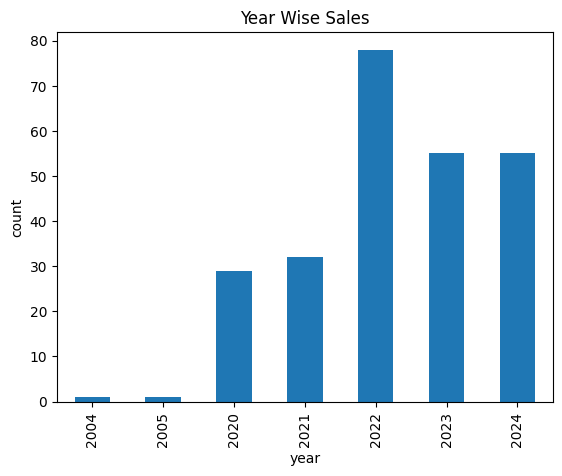

In [44]:
dataset.groupby('year')['amount'].count().plot(kind='bar',title='Year Wise Sales', ylabel='count')

#### Insights:
From the graph we just plotted we can see that year 2205 had the best sales out of all
years.
There was a steady increase of sales from the year20007 to240lig

### Which was the best month for sales between 2020 t0 2024?

<Axes: xlabel='month', ylabel='month'>

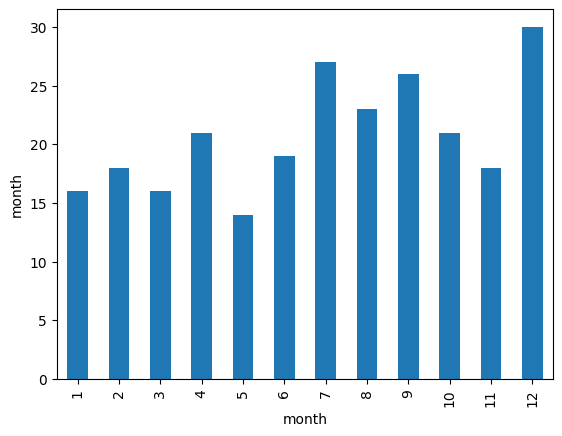

In [43]:
dataset_2020_2024 = dataset[(dataset['year'] >= 2020) & (dataset['year']<= 2024)]
dataset_2020_2024.groupby('month')['rating'].count().plot(kind='bar',ylabel='month')

#### Insights:
December was the month when most sales were made across the product categories and
over the years.

### What brand sold the most in the highest selling year(2020 to 2024)?

<Axes: title={'center': 'Brand Wise Top 10 Sales 2020 to 2024'}, xlabel='brand', ylabel='amount'>

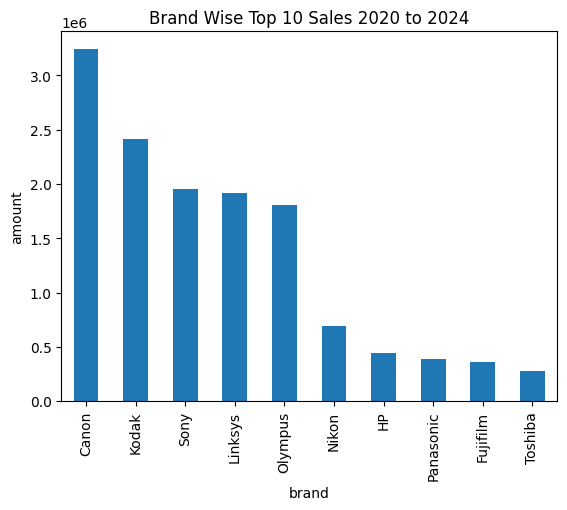

In [35]:
dataset_2015_2018 = dataset[(dataset['year'] >= 2020) & (dataset['year']<= 2024)]
dataset_2015_2018.groupby('brand')['amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Brand Wise Top 10 Sales 2020 to 2024',ylabel='amount')

#### Insights:
Canon was the brand with the most sales in 2020 to 2024 followed by kodak.

 ### What products sold the most in the three years 2022, 2023 & 2024?

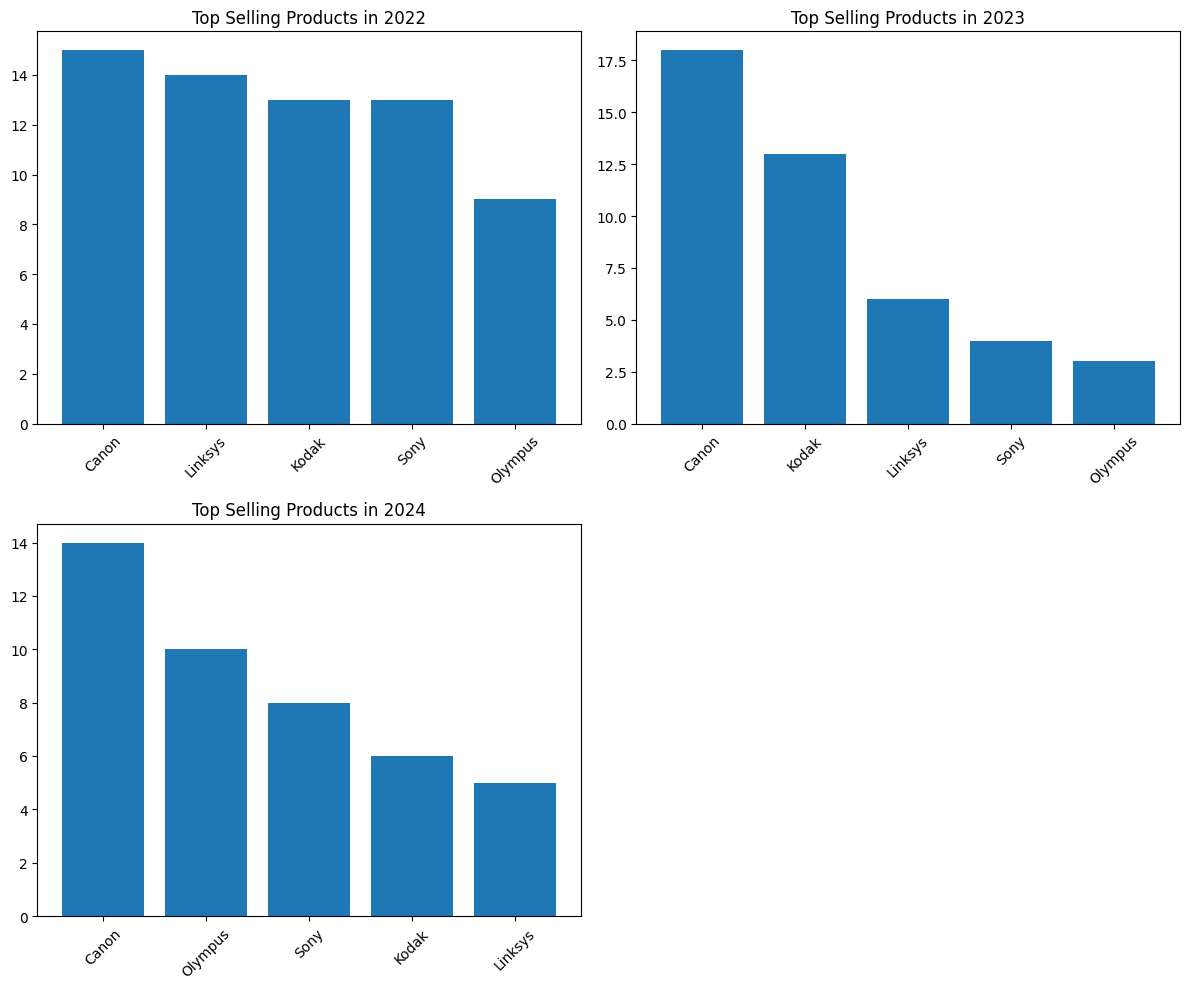

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Plot for 2022
top_selling_2022 = dataset[dataset['year'] ==
2022].groupby('brand')['rating'].count().sort_values(ascending=False).head(5)
axs[0, 0].bar(top_selling_2022.index, top_selling_2022)
axs[0, 0].set_title('Top Selling Products in 2022')
axs[0, 0].tick_params(axis='x', rotation=45) # Rotate x-axis labels
# Plot for 2023
top_selling_2023 = dataset[dataset['year'] ==
2023].groupby('brand')['rating'].count().sort_values(ascending=False).head(5)
axs[0, 1].bar(top_selling_2023.index, top_selling_2023)
axs[0, 1].set_title('Top Selling Products in 2023')
axs[0, 1].tick_params(axis='x', rotation=45) # Rotate x-axis labels
# Plot for 2024
top_selling_2024 = dataset[dataset['year'] ==
2024].groupby('brand')['rating'].count().sort_values(ascending=False).head(5)
axs[1, 0].bar(top_selling_2024.index, top_selling_2024)
axs[1, 0].set_title('Top Selling Products in 2024')
axs[1, 0].tick_params(axis='x', rotation=45) # Rotate x-axis labels
axs[1, 1].axis('off')
plt.tight_layout()
plt.show()

#### Insights:
There has been one consistent Brand product with the most sales in the 3 years and it
is Canon
The second most sold brand's products in between this years are Linksys, Kodak & Olympus.

● 2022 (Canon and Linksys)
● 2023 (Canon and Kodak)
● 2024 (Canon and Olympus)

### What product by category sold the most between 2020 to 2024?

<Axes: title={'center': 'Top 10 Most Sold Product Category 2020 to 2024'}, xlabel='category', ylabel='amount'>

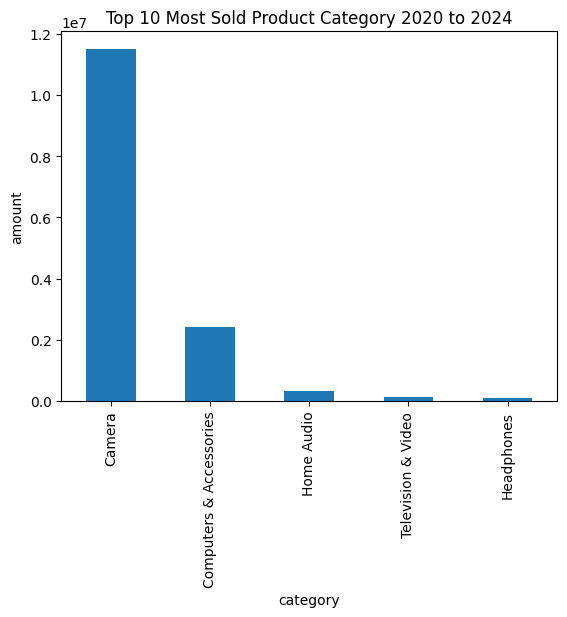

In [36]:
dataset2020_2024 = dataset[(dataset['year'] >= 2020) & (dataset['year']<= 2024)]
dataset2020_2024.groupby('category')['amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 Most Sold Product Category 2020 to 2024',ylabel='amount')

#### Insights:
We can see that the category of Cameras sold the most, computers and
accessories were sold the second most while Home Audio sold the third most.

### What product by category sold the least between 2022 to 2024?

<Axes: title={'center': '10 Least Sold Product Brand 2020 to 2024'}, xlabel='category', ylabel='amount'>

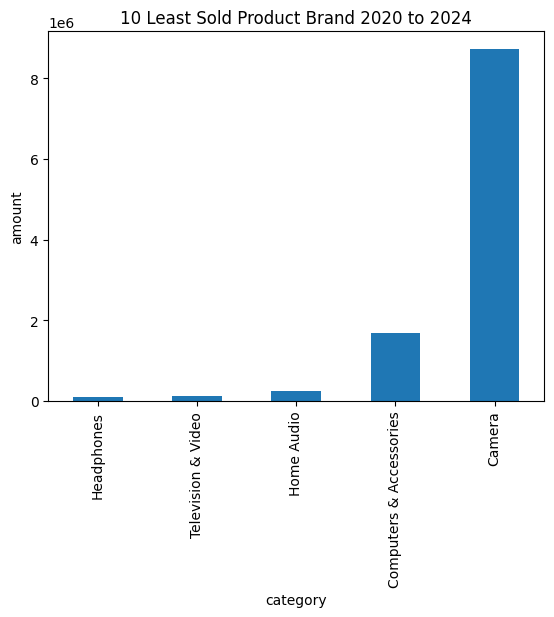

In [37]:
dataset2020_2024 = dataset[(dataset['year'] >= 2022) & (dataset['year']<= 2024)]
dataset2020_2024.groupby('category')['amount'].sum().sort_values(ascending=True).head(10).plot(kind='bar',ylabel='amount',title='10 Least Sold Product Brand 2020 to 2024')

#### Insights:
We can see that the category of Headphones are sold the least followed closely by
Television & Videos.

### What product by brand name sold the least between 2020 to 2024?

<Axes: title={'center': '10 Least Sold Product Brand 2020 to 2024'}, xlabel='brand', ylabel='amount'>

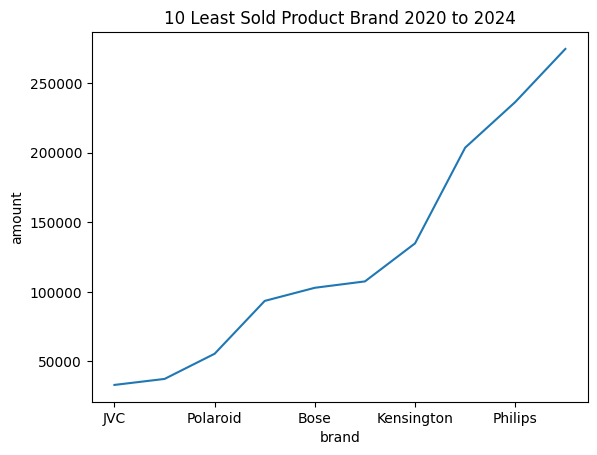

In [38]:
dataset2020_2024 = dataset[(dataset['year'] >= 2020) & (dataset['year']<= 2024)]
dataset2020_2024.groupby('brand')['amount'].sum().sort_values(ascending=True).head(10).plot(kind='line',title='10 Least Sold Product Brand 2020 to 2024',ylabel='amount')

#### Insights:
JVC sold the least followed closely with APPLE.

### Ratings Distribution

<Axes: xlabel='rating', ylabel='count'>

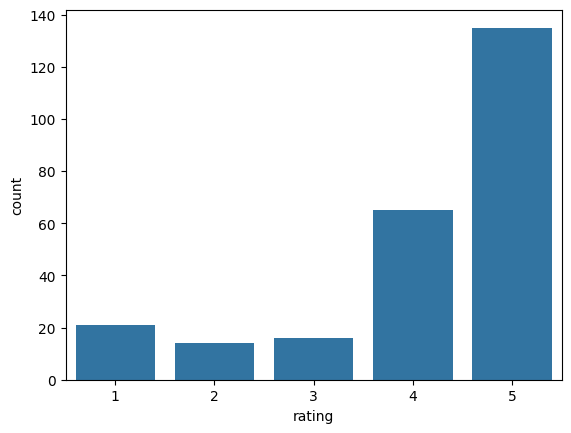

In [16]:
sns.countplot(x='rating', data=dataset)

#### Inference:
Most Products were rated 5

### Best rated brands

<Axes: title={'center': '10 most rating Brand 2020 to 2024'}, xlabel='brand', ylabel='count'>

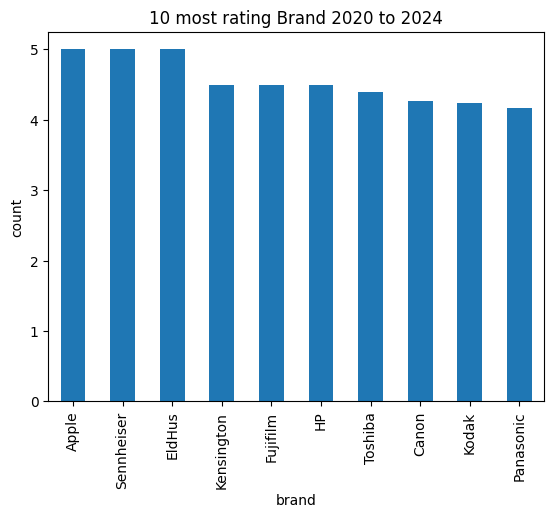

In [39]:
dataset2020_2024 = dataset[(dataset['year'] >= 2020) & (dataset['year']<= 2024)]
dataset2020_2024.groupby('brand')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar',title='10 most rating Brand 2020 to 2024',ylabel='count')

#### Insights:
Apple, Sennheiser and ELDUS were the brands with the highest ratings.

### Top 5 category sales percentage

<Axes: title={'center': 'Top 3 category sales percentage'}, ylabel='amount'>

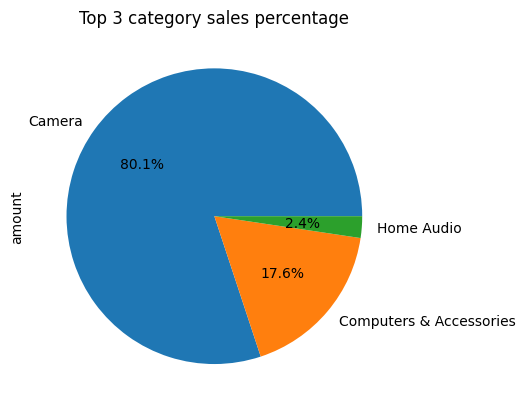

In [18]:
dataset.groupby('category')['amount'].sum().sort_values(ascending=False).head(3).plot(kind='pie', autopct='%1.1f%%',title='Top 3 category sales percentage')

#### Insights:
Cameras sales % is the highest followed by Computers & Accessories.

### Brand wise sales percentage

<Axes: title={'center': 'Top 5 Brand wise sales percentage'}, ylabel='rating'>

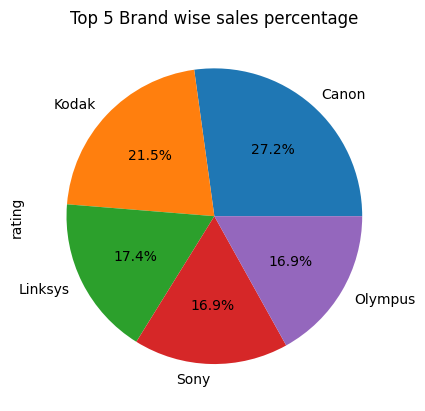

In [19]:
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%',title='Top 5 Brand wise sales percentage')

#### Insights:
kodak and Canon sales % is the highest followed by Sony and Olympus.

### Gender wise customer distribution

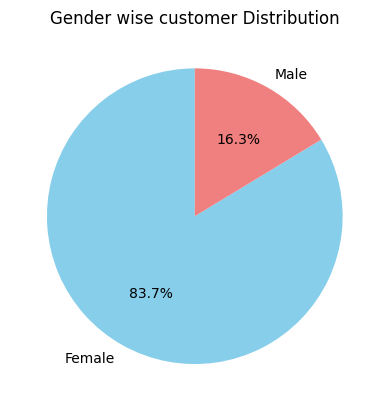

In [20]:
gender_distribution = dataset['gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index,
autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender wise customer Distribution')
plt.show()

#### Inference:
Most of the customers are in Female categories.

## Conclusion:
● 2020 was the best year in terms of sales and profit

● Cameras was the category with most sales followed closely with Computer and Accessories while the least sales were made in the Headphones category.

● There has been a steady rise in sales from 2020 to 2021 and a sharp decline from 2022 to 2024.

● The brand name Bose sold the most followed by Logitech.

● The brand JVC sold the least followed closely with APPLE.

● Most products were rated 5.

● Best rated brands were Apple and sennheiser.

#### With this foresight a company can make decisions whether to continue production/sales of a specific product for the future.